# Fase 2: Schema Mediation

Questo notebook esegue l'allineamento degli attributi dalle due sorgenti dati allo **schema mediato**.

## Obiettivi
1. Definire lo schema mediato comune
2. Mappare gli attributi di Craigslist e US Used Cars allo schema mediato
3. Applicare trasformazioni e normalizzazioni
4. Generare dataset allineati
5. Salvare i risultati in `data/processed/`

## Schema Mediato
Secondo il `config.yaml`, lo schema mediato include:
- `vin`, `price`, `year`, `manufacturer`, `model`, `condition`, `cylinders`
- `fuel`, `odometer`, `transmission`, `drive`, `size`, `type`, `paint_color`
- `state`, `description`

## 1. Import Librerie

In [30]:
import sys
import os

# Aggiungi il percorso della cartella src al PYTHONPATH
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
sys.path.append(os.path.abspath('..'))

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import moduli personalizzati
from src.schema_mediation import MediatedSchema, SourceAligner

# Imposta stile grafici
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Librerie importate con successo!")

✓ Librerie importate con successo!


In [32]:
# Ricarica il modulo dopo modifiche
import importlib
import src.schema_mediation
importlib.reload(src.schema_mediation)
from src.schema_mediation import MediatedSchema, SourceAligner
print("✓ Modulo ricaricato!")

✓ Modulo ricaricato!


## 2. Caricamento Dataset

In [33]:
# Percorsi dei dataset
craigslist_path = '../data/raw/craigslist/vehicles.csv'
usedcars_path = '../data/raw/usedcars/used_cars_data.csv'

# Carica i dataset
print("Caricamento dataset Craigslist...")
df_craigslist = pd.read_csv(craigslist_path, low_memory=False)
print(f"✓ Craigslist caricato: {len(df_craigslist):,} righe, {len(df_craigslist.columns)} colonne")

print("\nCaricamento dataset US Used Cars...")
df_usedcars = pd.read_csv(usedcars_path, low_memory=False)
print(f"✓ US Used Cars caricato: {len(df_usedcars):,} righe, {len(df_usedcars.columns)} colonne")

Caricamento dataset Craigslist...
✓ Craigslist caricato: 426,880 righe, 26 colonne

Caricamento dataset US Used Cars...
✓ US Used Cars caricato: 3,000,040 righe, 66 colonne


## 3. Verifica Colonne Disponibili

In [34]:
print("COLONNE CRAIGSLIST:")
print("=" * 80)
print(sorted(df_craigslist.columns.tolist()))

print("\n" + "=" * 80)
print("COLONNE US USED CARS:")
print("=" * 80)
print(sorted(df_usedcars.columns.tolist()))

COLONNE CRAIGSLIST:
['VIN', 'condition', 'county', 'cylinders', 'description', 'drive', 'fuel', 'id', 'image_url', 'lat', 'long', 'manufacturer', 'model', 'odometer', 'paint_color', 'posting_date', 'price', 'region', 'region_url', 'size', 'state', 'title_status', 'transmission', 'type', 'url', 'year']

COLONNE US USED CARS:
['back_legroom', 'bed', 'bed_height', 'bed_length', 'body_type', 'cabin', 'city', 'city_fuel_economy', 'combine_fuel_economy', 'daysonmarket', 'dealer_zip', 'description', 'engine_cylinders', 'engine_displacement', 'engine_type', 'exterior_color', 'fleet', 'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height', 'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab', 'is_certified', 'is_cpo', 'is_new', 'is_oemcpo', 'latitude', 'length', 'listed_date', 'listing_color', 'listing_id', 'longitude', 'main_picture_url', 'major_options', 'make_name', 'maximum_seating', 'mileage', 'model_nam

## 4. Creazione Schema Mediato

In [35]:
# Crea schema mediato dal file di configurazione
schema = MediatedSchema(config_path='../config.yaml')

print("SCHEMA MEDIATO:")
print("=" * 80)
for i, attr in enumerate(schema.schema, 1):
    print(f"{i:2d}. {attr}")

print(f"\n✓ Schema mediato caricato con {len(schema.schema)} attributi")

SCHEMA MEDIATO:
 1. vin
 2. price
 3. year
 4. manufacturer
 5. model
 6. condition
 7. cylinders
 8. fuel
 9. odometer
10. transmission
11. drive
12. size
13. type
14. paint_color
15. state
16. description

✓ Schema mediato caricato con 16 attributi


## 5. Verifica Mapping Attributi

In [36]:
# Mapping Craigslist
craigslist_mapping = schema.get_craigslist_mapping()
print("MAPPING CRAIGSLIST → SCHEMA MEDIATO:")
print("=" * 80)
for source, target in craigslist_mapping.items():
    exists = "✓" if source in df_craigslist.columns else "✗"
    print(f"{exists} {source:20s} → {target}")

print(f"\n{sum(1 for k in craigslist_mapping.keys() if k in df_craigslist.columns)}/{len(craigslist_mapping)} attributi disponibili")

MAPPING CRAIGSLIST → SCHEMA MEDIATO:
✓ VIN                  → vin
✓ price                → price
✓ year                 → year
✓ manufacturer         → manufacturer
✓ model                → model
✓ condition            → condition
✓ cylinders            → cylinders
✓ fuel                 → fuel
✓ odometer             → odometer
✓ transmission         → transmission
✓ drive                → drive
✓ size                 → size
✓ type                 → type
✓ paint_color          → paint_color
✓ state                → state
✓ description          → description

16/16 attributi disponibili


In [37]:
# Mapping US Used Cars
usedcars_mapping = schema.get_usedcars_mapping()
print("MAPPING US USED CARS → SCHEMA MEDIATO:")
print("=" * 80)
for source, target in usedcars_mapping.items():
    exists = "✓" if source in df_usedcars.columns else "✗"
    print(f"{exists} {source:20s} → {target}")

print(f"\n{sum(1 for k in usedcars_mapping.keys() if k in df_usedcars.columns)}/{len(usedcars_mapping)} attributi disponibili")

MAPPING US USED CARS → SCHEMA MEDIATO:
✓ vin                  → vin
✓ price                → price
✓ year                 → year
✓ make_name            → manufacturer
✓ model_name           → model
✓ body_type            → type
✓ fuel_type            → fuel
✓ transmission         → transmission
✓ mileage              → odometer
✓ exterior_color       → paint_color
✓ engine_cylinders     → cylinders
✓ wheel_system         → drive
✓ description          → description

13/13 attributi disponibili


## 6. Allineamento Craigslist

In [38]:
# Crea aligner
aligner = SourceAligner(schema)

# Allinea dataset Craigslist
print("Allineamento dataset Craigslist...")
df_craigslist_aligned = aligner.align_craigslist(df_craigslist)

print(f"✓ Craigslist allineato: {len(df_craigslist_aligned):,} righe, {len(df_craigslist_aligned.columns)} colonne")
print(f"\nColonne nel dataset allineato:")
print(df_craigslist_aligned.columns.tolist())

Allineamento dataset Craigslist...
✓ Craigslist allineato: 426,880 righe, 17 colonne

Colonne nel dataset allineato:
['vin', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state', 'description', 'source']


In [39]:
# Visualizza campione
print("CAMPIONE CRAIGSLIST ALLINEATO:")
print("=" * 80)
display(df_craigslist_aligned.head(10))

CAMPIONE CRAIGSLIST ALLINEATO:


,vin,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state,description,source
0,None,6000.0,NaN,None,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,az,NaN,craigslist
1,None,11900.0,NaN,None,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,ar,NaN,craigslist
2,None,21000.0,NaN,None,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,fl,NaN,craigslist
3,None,1500.0,NaN,None,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,ma,NaN,craigslist
4,None,4900.0,NaN,None,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,nc,NaN,craigslist
5,None,1600.0,NaN,None,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,ny,NaN,craigslist
6,None,1000.0,NaN,None,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,ny,NaN,craigslist
7,None,15995.0,NaN,None,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,ny,NaN,craigslist
8,None,5000.0,NaN,None,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,or,NaN,craigslist
9,None,3000.0,NaN,None,NaN,NaN,NaN,None,NaN,None,NaN,NaN,NaN,NaN,pa,NaN,craigslist


In [40]:
# Statistiche sui valori nulli dopo allineamento
print("STATISTICHE VALORI NULLI - CRAIGSLIST ALLINEATO:")
print("=" * 80)
null_stats_cl = pd.DataFrame({
    'attribute': df_craigslist_aligned.columns,
    'null_count': df_craigslist_aligned.isnull().sum().values,
    'null_percentage': (df_craigslist_aligned.isnull().sum() / len(df_craigslist_aligned) * 100).values
})
null_stats_cl = null_stats_cl.sort_values('null_percentage', ascending=False)
display(null_stats_cl)

STATISTICHE VALORI NULLI - CRAIGSLIST ALLINEATO:


,attribute,null_count,null_percentage
11,size,306361,71.767476
6,cylinders,177678,41.622470
5,condition,174104,40.785232
0,vin,161353,37.798210
10,drive,130567,30.586347
13,paint_color,130203,30.501078
12,type,92858,21.752717
1,price,36290,8.501218
3,manufacturer,17646,4.133714
4,model,5277,1.236179


## 7. Allineamento US Used Cars

In [41]:
# Allinea dataset US Used Cars
print("Allineamento dataset US Used Cars...")
df_usedcars_aligned = aligner.align_usedcars(df_usedcars)

print(f"✓ US Used Cars allineato: {len(df_usedcars_aligned):,} righe, {len(df_usedcars_aligned.columns)} colonne")
print(f"\nColonne nel dataset allineato:")
print(df_usedcars_aligned.columns.tolist())

Allineamento dataset US Used Cars...
✓ US Used Cars allineato: 3,000,040 righe, 14 colonne

Colonne nel dataset allineato:
['vin', 'price', 'year', 'manufacturer', 'model', 'type', 'fuel', 'transmission', 'odometer', 'paint_color', 'cylinders', 'drive', 'description', 'source']


In [42]:
# Visualizza campione
print("CAMPIONE US USED CARS ALLINEATO:")
print("=" * 80)
display(df_usedcars_aligned.head(10))

CAMPIONE US USED CARS ALLINEATO:


,vin,price,year,manufacturer,model,type,fuel,transmission,odometer,paint_color,cylinders,drive,description,source
0,ZACNJABB5KPJ92081,23141.0,2019,jeep,Renegade,SUV / Crossover,gas,other,7.0,Solar Yellow,I4,FWD,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,usedcars
1,SALCJ2FX1LH858117,46500.0,2020,land rover,Discovery Sport,SUV / Crossover,gas,other,8.0,Narvik Black,I4,AWD,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",usedcars
2,JF1VA2M67G9829723,46995.0,2016,subaru,WRX STI,Sedan,gas,other,NaN,NaN,H4,AWD,NaN,usedcars
3,SALRR2RV0L2433391,67430.0,2020,land rover,Discovery,SUV / Crossover,gas,other,11.0,Eiger Gray,V6,AWD,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",usedcars
4,SALCJ2FXXLH862327,48880.0,2020,land rover,Discovery Sport,SUV / Crossover,gas,other,7.0,Narvik Black,I4,AWD,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",usedcars
5,SALYK2EX1LA261711,66903.0,2020,land rover,Range Rover Velar,SUV / Crossover,gas,other,12.0,Kaikoura Stone,I4,AWD,"[!@@Additional Info@@!]Tires: 21' All-Season,A...",usedcars
6,3MZBPABL6KM107908,23695.0,2019,mazda,MAZDA3,Sedan,gas,other,14.0,SONIC SILVER,I4,FWD,"[!@@Additional Info@@!]4-Wheel Disc Brakes,A/C...",usedcars
7,SALYK2EX5LA275434,68520.0,2020,land rover,Range Rover Velar,SUV / Crossover,gas,other,11.0,Fuji White,I4,AWD,"[!@@Additional Info@@!]Tires: 21' All-Season,A...",usedcars
8,SALCJ2FX6LH858128,51245.0,2020,land rover,Discovery Sport,SUV / Crossover,gas,other,8.0,Eiger Gray,I4,AWD,"[!@@Additional Info@@!]Keyless Entry,Chrome Wh...",usedcars
9,SALZL2GX4LH007593,84399.0,2020,land rover,Range Rover Evoque,SUV / Crossover,gas,other,254.0,Blanco,I4,AWD,"[!@@Additional Info@@!]4-Wheel Disc Brakes,A/C...",usedcars


In [43]:
# Statistiche sui valori nulli dopo allineamento
print("STATISTICHE VALORI NULLI - US USED CARS ALLINEATO:")
print("=" * 80)
null_stats_uc = pd.DataFrame({
    'attribute': df_usedcars_aligned.columns,
    'null_count': df_usedcars_aligned.isnull().sum().values,
    'null_percentage': (df_usedcars_aligned.isnull().sum() / len(df_usedcars_aligned) * 100).values
})
null_stats_uc = null_stats_uc.sort_values('null_percentage', ascending=False)
display(null_stats_uc)

STATISTICHE VALORI NULLI - US USED CARS ALLINEATO:


,attribute,null_count,null_percentage
11,drive,146732,4.891001
8,odometer,144395,4.813102
10,cylinders,100581,3.352655
6,fuel,82724,2.757430
12,description,77901,2.596665
7,transmission,64185,2.139471
9,paint_color,49955,1.665144
5,type,13543,0.451427
0,vin,1005,0.033500
1,price,108,0.003600


## 8. Confronto tra Dataset Allineati

In [44]:
# Confronto colonne comuni
common_cols = set(df_craigslist_aligned.columns) & set(df_usedcars_aligned.columns)
print(f"COLONNE COMUNI NEI DATASET ALLINEATI: {len(common_cols)}")
print("=" * 80)
print(sorted(common_cols))

# Colonne solo in Craigslist
only_cl = set(df_craigslist_aligned.columns) - set(df_usedcars_aligned.columns)
if only_cl:
    print(f"\nCOLONNE SOLO IN CRAIGSLIST: {len(only_cl)}")
    print(sorted(only_cl))

# Colonne solo in US Used Cars
only_uc = set(df_usedcars_aligned.columns) - set(df_craigslist_aligned.columns)
if only_uc:
    print(f"\nCOLONNE SOLO IN US USED CARS: {len(only_uc)}")
    print(sorted(only_uc))

COLONNE COMUNI NEI DATASET ALLINEATI: 14
['cylinders', 'description', 'drive', 'fuel', 'manufacturer', 'model', 'odometer', 'paint_color', 'price', 'source', 'transmission', 'type', 'vin', 'year']

COLONNE SOLO IN CRAIGSLIST: 3
['condition', 'size', 'state']


In [45]:
# Statistiche riassuntive
summary_comparison = pd.DataFrame({
    'Metrica': ['Righe', 'Colonne', 'Valori Nulli (%)', 'VIN Validi', 'VIN Validi (%)'],
    'Craigslist': [
        f"{len(df_craigslist_aligned):,}",
        len(df_craigslist_aligned.columns),
        f"{(df_craigslist_aligned.isnull().sum().sum() / (len(df_craigslist_aligned) * len(df_craigslist_aligned.columns)) * 100):.2f}%",
        f"{df_craigslist_aligned['vin'].notna().sum():,}" if 'vin' in df_craigslist_aligned.columns else 'N/A',
        f"{(df_craigslist_aligned['vin'].notna().sum() / len(df_craigslist_aligned) * 100):.2f}%" if 'vin' in df_craigslist_aligned.columns else 'N/A'
    ],
    'US Used Cars': [
        f"{len(df_usedcars_aligned):,}",
        len(df_usedcars_aligned.columns),
        f"{(df_usedcars_aligned.isnull().sum().sum() / (len(df_usedcars_aligned) * len(df_usedcars_aligned.columns)) * 100):.2f}%",
        f"{df_usedcars_aligned['vin'].notna().sum():,}" if 'vin' in df_usedcars_aligned.columns else 'N/A',
        f"{(df_usedcars_aligned['vin'].notna().sum() / len(df_usedcars_aligned) * 100):.2f}%" if 'vin' in df_usedcars_aligned.columns else 'N/A'
    ]
})

print("CONFRONTO STATISTICHE:")
print("=" * 80)
display(summary_comparison)

CONFRONTO STATISTICHE:


,Metrica,Craigslist,US Used Cars
0,Righe,"426,880","3,000,040"
1,Colonne,17,14
2,Valori Nulli (%),17.14%,1.62%
3,VIN Validi,"265,527","2,999,035"
4,VIN Validi (%),62.20%,99.97%


## 9. Salvataggio Dataset Allineati

In [46]:
# Crea directory se non esiste
os.makedirs('../data/processed', exist_ok=True)

# Salva dataset allineati
craigslist_output = '../data/processed/craigslist_aligned.csv'
usedcars_output = '../data/processed/usedcars_aligned.csv'

print("Salvataggio dataset allineati...")
df_craigslist_aligned.to_csv(craigslist_output, index=False)
print(f"✓ Craigslist salvato in: {craigslist_output}")

df_usedcars_aligned.to_csv(usedcars_output, index=False)
print(f"✓ US Used Cars salvato in: {usedcars_output}")

print(f"\n Fase 2 completata con successo!")

Salvataggio dataset allineati...
✓ Craigslist salvato in: ../data/processed/craigslist_aligned.csv
✓ US Used Cars salvato in: ../data/processed/usedcars_aligned.csv

 Fase 2 completata con successo!


## 10. Verifica Qualità Allineamento

Verifichiamo alcuni aspetti della qualità dell'allineamento:

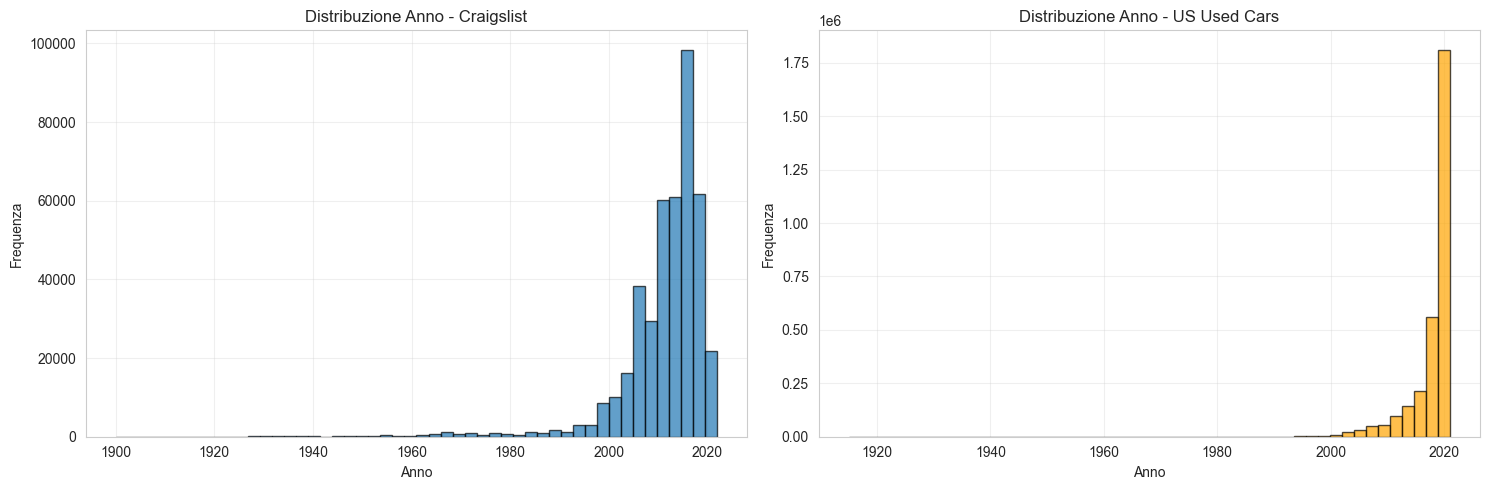

Craigslist - Anno range: 1900 - 2022
US Used Cars - Anno range: 1915 - 2021


In [47]:
# Verifica distributioni valori per attributi chiave
if 'year' in df_craigslist_aligned.columns and 'year' in df_usedcars_aligned.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Craigslist
    year_cl = df_craigslist_aligned['year'].dropna()
    axes[0].hist(year_cl, bins=50, edgecolor='black', alpha=0.7)
    axes[0].set_title('Distribuzione Anno - Craigslist')
    axes[0].set_xlabel('Anno')
    axes[0].set_ylabel('Frequenza')
    axes[0].grid(True, alpha=0.3)
    
    # US Used Cars
    year_uc = df_usedcars_aligned['year'].dropna()
    axes[1].hist(year_uc, bins=50, edgecolor='black', alpha=0.7, color='orange')
    axes[1].set_title('Distribuzione Anno - US Used Cars')
    axes[1].set_xlabel('Anno')
    axes[1].set_ylabel('Frequenza')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../results/visualizations/year_distribution_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"Craigslist - Anno range: {year_cl.min():.0f} - {year_cl.max():.0f}")
    print(f"US Used Cars - Anno range: {year_uc.min():.0f} - {year_uc.max():.0f}")

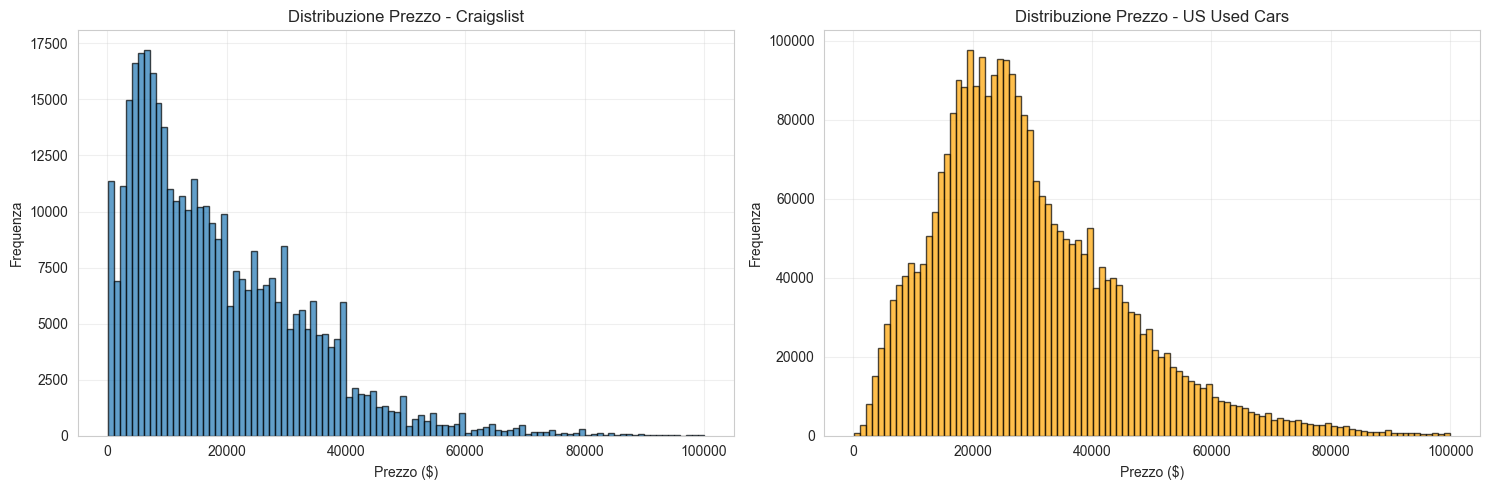

Craigslist - Prezzo medio: $19062.62, mediano: $15500.00
US Used Cars - Prezzo medio: $29895.57, mediano: $26477.00


In [48]:
# Verifica distribuzione prezzi
if 'price' in df_craigslist_aligned.columns and 'price' in df_usedcars_aligned.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Craigslist (filtra outlier per visualizzazione migliore)
    price_cl = df_craigslist_aligned['price'].dropna()
    price_cl_filtered = price_cl[(price_cl > 0) & (price_cl < 100000)]
    axes[0].hist(price_cl_filtered, bins=100, edgecolor='black', alpha=0.7)
    axes[0].set_title('Distribuzione Prezzo - Craigslist')
    axes[0].set_xlabel('Prezzo ($)')
    axes[0].set_ylabel('Frequenza')
    axes[0].grid(True, alpha=0.3)
    
    # US Used Cars
    price_uc = df_usedcars_aligned['price'].dropna()
    price_uc_filtered = price_uc[(price_uc > 0) & (price_uc < 100000)]
    axes[1].hist(price_uc_filtered, bins=100, edgecolor='black', alpha=0.7, color='orange')
    axes[1].set_title('Distribuzione Prezzo - US Used Cars')
    axes[1].set_xlabel('Prezzo ($)')
    axes[1].set_ylabel('Frequenza')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../results/visualizations/price_distribution_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"Craigslist - Prezzo medio: ${price_cl.mean():.2f}, mediano: ${price_cl.median():.2f}")
    print(f"US Used Cars - Prezzo medio: ${price_uc.mean():.2f}, mediano: ${price_uc.median():.2f}")

In [49]:
# Verifica top manufacturer dopo normalizzazione
if 'manufacturer' in df_craigslist_aligned.columns and 'manufacturer' in df_usedcars_aligned.columns:
    print("TOP 10 MANUFACTURER - CRAIGSLIST:")
    print("=" * 80)
    print(df_craigslist_aligned['manufacturer'].value_counts().head(10))
    
    print("\n" + "=" * 80)
    print("TOP 10 MANUFACTURER - US USED CARS:")
    print("=" * 80)
    print(df_usedcars_aligned['manufacturer'].value_counts().head(10))

TOP 10 MANUFACTURER - CRAIGSLIST:
manufacturer
ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
jeep         19014
ram          18342
gmc          16785
bmw          14699
dodge        13707
Name: count, dtype: int64

TOP 10 MANUFACTURER - US USED CARS:
manufacturer
ford         476336
chevrolet    376892
toyota       239128
nissan       217896
honda        214459
jeep         168434
hyundai      136097
kia          112330
ram          102545
gmc           99293
Name: count, dtype: int64
manufacturer
ford         476336
chevrolet    376892
toyota       239128
nissan       217896
honda        214459
jeep         168434
hyundai      136097
kia          112330
ram          102545
gmc           99293
Name: count, dtype: int64
